In [1]:
import networkx as nx
import unicodecsv as csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def graph_from_csv(path):
    graph = nx.Graph(name="Heroic Social Network")
    with open(path, 'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            graph.add_edge(*row)
    return graph

In [8]:
graph.order() # graph.number_of_nodes()
graph.size()  # graph.number_of_edges()

96104

In [4]:
def graph_from_gdf(path):
    graph = nx.Graph(name="Characters in Comics")
    with open(path, 'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            if 'nodedef' in row[0]:
                handler = lambda row,G: G.add_node(row[0],  
                  TYPE=row[1])
            elif 'edgedef' in row[0]:
                handler = lambda row,G: G.add_edge(*row)
            else:
                handler(row, graph)
    return graph

In [9]:
nx.info(graph)
ego = nx.ego_graph(graph, actor, 1)

NameError: name 'actor' is not defined

In [6]:
def draw_ego_graph(graph, character, hops=1):
    """
    Expecting a graph_from_gdf
    """

    # Get the Ego Graph and Position
    ego = nx.ego_graph(graph, character, hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize=(12,12))
    plt.axis('off')

    # Coloration and Configuration
    ego.node[character]["TYPE"] = "center"
    valmap = { "comic": 0.25, "hero": 0.54, "center": 0.87 }
    types  = nx.get_node_attributes(ego, "TYPE")
    values = [valmap.get(types[node], 0.25) for node in  
      ego.nodes()]

    # Draw
    nx.draw_networkx_edges(ego, pos, alpha=0.4)
    nx.draw_networkx_nodes(ego, pos,
                           node_size=80,
                           node_color=values,
                           cmap=plt.cm.hot, with_labels=False)

    plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


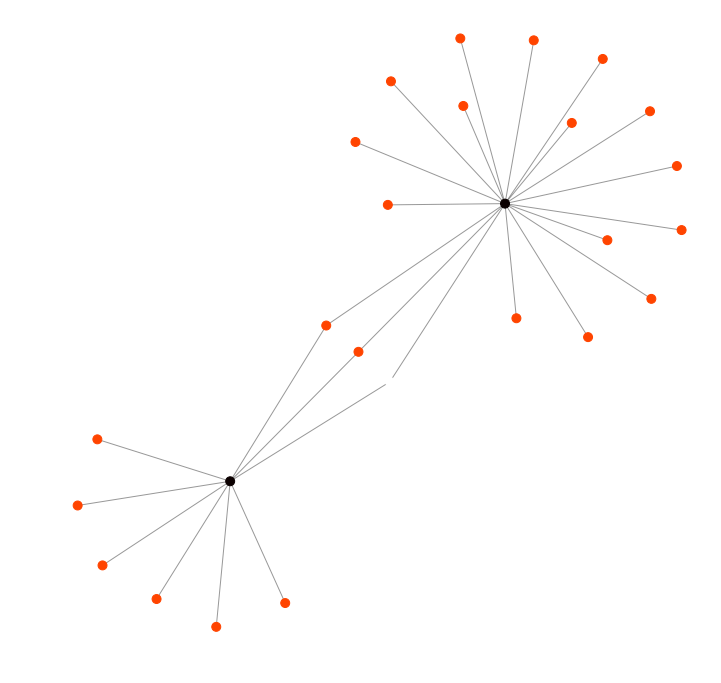

In [13]:
graph = graph_from_gdf('comic-hero-network.gdf')
draw_ego_graph(graph, "LONGBOW/AMELIA GREER",2)

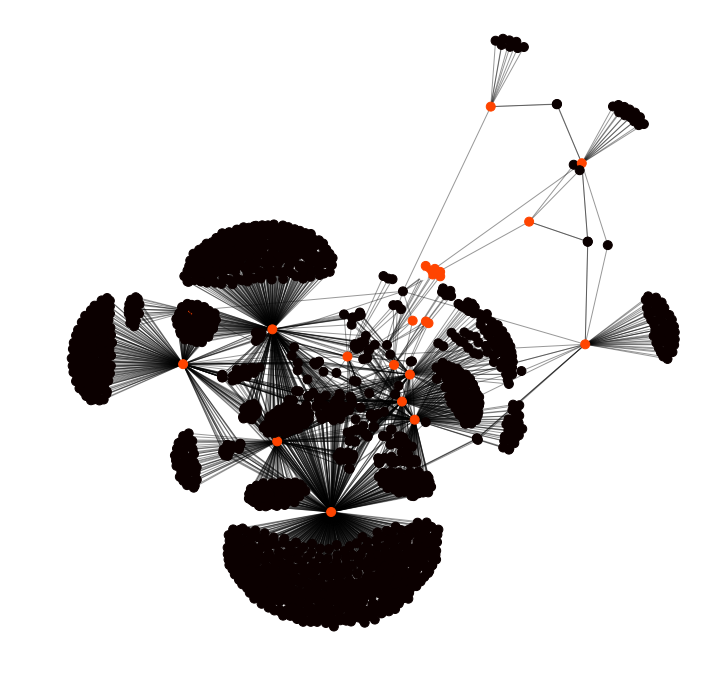

In [11]:
draw_ego_graph(graph, "LONGBOW/AMELIA GREER", 3)

In [17]:
def transform_to_weighted_heros(comics):
    # Create new graph to fill in
    heros = nx.Graph(name="Weighted Heroic Social Network")
    # Iterate through all the nodes and their properties
    for node, data in graph.nodes(data=True):
        # We don't care about comics, only heros
        if data['TYPE'] == 'comic': continue
        # Add the hero and their properties (this will also update data)
        heros.add_node(node, **data)

        # Find all the heros connected via the comic books
        for comic in graph[node]:
            for alter in graph[comic]:
                # Skip the hero that we're on
                if alter == node: continue

                # Setup the default edge
                if alter not in heros[node]:
                    heros.add_edge(node, alter, weight=0.0,  
                      label="knows")

                # The weight of the hero is the fraction of  connections / 2
                heros[node][alter]["weight"] += 1.0 / (graph.degree(comic) *2)
    return heros


In [19]:
def draw_weighted_ego_graph(graph, character, hops=1):
    # Graph and Position
    ego = nx.ego_graph(graph, character, hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize=(12,12))
    plt.axis('off')

    # Coloration and Configuration
    ego.node[character]["TYPE"] = "center"
    valmap = { "hero": 0.0, "center": 1.0 }
    types  = nx.get_node_attributes(ego, "TYPE")
    values = [valmap.get(types[node], 0.25) for node in ego.nodes()]
    char_edges = ego.edges(data=True, nbunch=[character,])
    nonchar_edges = ego.edges(nbunch=[n for n in ego.nodes() if n != character])
    elarge=[(u,v) for (u,v,d) in char_edges if d['weight'] >=0.12]
    esmall=[(u,v) for (u,v,d) in char_edges if d['weight'] < 0.12]
    print (set([d['weight'] for (u,v,d) in char_edges]))

    # Draw
    nx.draw_networkx_nodes(ego, pos, node_size=200, node_color=values, cmap=plt.cm.Paired, with_labels=False)

    nx.draw_networkx_edges(ego,pos,edgelist=elarge, width=1.5, edge_color='b')
    nx.draw_networkx_edges(ego,pos,edgelist=esmall, width=1,alpha=0.5, edge_color='b',style='dashed')
    nx.draw_networkx_edges(ego,pos,edgelist=nonchar_edges, width=0.5,alpha=0.2,style='dashed')
    plt.show()